<a href="https://colab.research.google.com/github/nelmalfernando/Nelmal_INSE_6220_Project/blob/main/Multiclass%20Classification%20with%20PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again:
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/nelmalfernando/Nelmal_INSE_6220_Project/main/abalone.csv')
df.head(25)

,Class,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [7]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [8]:
from pycaret.classification import *
clf_pca = setup(data=df, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,session_id,123
1,Target,Class
2,Target Type,Multiclass
3,Label Encoded,"F: 0, I: 1, M: 2"
4,Original Data,"(4177, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Class')),
                ('fix_perfect', Remove_100(target='Class')),
                ('clean_names', Clean_Colum_Names()),
       

In [9]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5354,0.7290,0.5344,0.5214,0.4967,0.2980,0.3146,0.012
lr,Logistic Regression,0.5330,0.7415,0.5365,0.5270,0.5256,0.2973,0.2996,0.387
qda,Quadratic Discriminant Analysis,0.5323,0.7321,0.5314,0.5129,0.4904,0.2937,0.3109,0.013
gbc,Gradient Boosting Classifier,0.5323,0.7351,0.5366,0.5246,0.5263,0.2971,0.2982,1.102
ridge,Ridge Classifier,0.5320,0.0000,0.5363,0.5172,0.5118,0.2975,0.3043,0.009
svm,SVM - Linear Kernel,0.5279,0.0000,0.5322,0.4740,0.4651,0.2913,0.3204,0.027
lda,Linear Discriminant Analysis,0.5217,0.7394,0.5233,0.5187,0.5111,0.2786,0.2834,0.013
rf,Random Forest Classifier,0.5186,0.7164,0.5235,0.5143,0.5153,0.2774,0.2779,0.364
ada,Ada Boost Classifier,0.5186,0.7170,0.5216,0.5099,0.5061,0.2754,0.2795,0.119
et,Extra Trees Classifier,0.5115,0.7115,0.5157,0.5081,0.5087,0.2664,0.2669,0.279


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


In [10]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune the Best Model**

In [11]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5085,0.7110,0.5078,0.4816,0.4596,0.2584,0.2758
1,0.5597,0.7593,0.5675,0.5463,0.5471,0.3415,0.3452
2,0.5119,0.7193,0.5107,0.4678,0.4669,0.2620,0.2771
3,0.5548,0.7402,0.5510,0.5499,0.5155,0.3251,0.3464
4,0.5479,0.7493,0.5469,0.5559,0.5156,0.3165,0.3337
5,0.5274,0.7173,0.5248,0.5095,0.4838,0.2851,0.3029
6,0.5445,0.7198,0.5392,0.5170,0.4861,0.3096,0.3354
7,0.5582,0.7447,0.5557,0.5744,0.5212,0.3314,0.3521
8,0.5137,0.7103,0.5101,0.5017,0.4659,0.2629,0.2826
9,0.5308,0.7348,0.5321,0.5049,0.4939,0.2915,0.3045


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=0.002)
INFO:logs:tune_model() succesfully completed......................................


In [12]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=0.002)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [13]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=0.002), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [14]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 15.6 MB/s eta 0:00:00


In [ ]:
#import the SHAP (SHapley Additive exPlanations) library
import shap

In [15]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4846,0.6914,0.4880,0.4781,0.4809,0.2265,0.2267
1,0.5119,0.7280,0.5168,0.5083,0.5098,0.2671,0.2673
2,0.5563,0.7269,0.5622,0.5547,0.5548,0.3347,0.3352
3,0.5582,0.7411,0.5626,0.5654,0.5608,0.3366,0.3372
4,0.5103,0.7269,0.5128,0.4997,0.5034,0.2634,0.2643
5,0.4897,0.6934,0.4931,0.4861,0.4873,0.2330,0.2333
6,0.5582,0.7355,0.5635,0.5562,0.5554,0.3384,0.3396
7,0.4795,0.6898,0.4886,0.4634,0.4681,0.2214,0.2229
8,0.4726,0.6803,0.4776,0.4648,0.4675,0.2065,0.2071
9,0.5651,0.7512,0.5693,0.5659,0.5655,0.3460,0.3460


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [16]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5358,0.7284,0.5489,0.5254,0.5065,0.3102,0.3242
1,0.5495,0.7506,0.5645,0.5250,0.5084,0.3311,0.3505
2,0.5461,0.7504,0.5634,0.5468,0.4849,0.3282,0.3669
3,0.5616,0.7536,0.5781,0.5628,0.5182,0.3505,0.3814
4,0.5616,0.7438,0.5778,0.5436,0.5170,0.3501,0.3735
5,0.5308,0.7294,0.5469,0.5135,0.4842,0.3050,0.3283
6,0.5171,0.7457,0.5342,0.4915,0.4622,0.2855,0.3124
7,0.5205,0.7331,0.5399,0.4861,0.4646,0.2913,0.3156
8,0.5103,0.7162,0.5262,0.4866,0.4766,0.2734,0.2864
9,0.5137,0.7515,0.5303,0.4779,0.4813,0.2773,0.2868


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


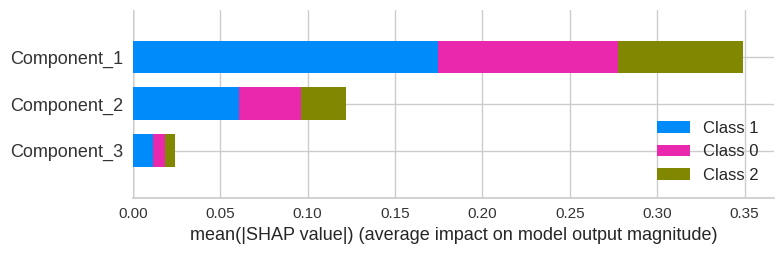

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [17]:
interpret_model(tuned_rf_pca, plot='summary')

In [18]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [19]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [20]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
